In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Dense,Activation,LSTM,GRU,Embedding
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df=pd.read_csv("/content/ara_.txt",delimiter="\t",names=["input","target"])

In [ ]:
df.head()

,input,target
0,Hi.,مرحبًا.
1,Run!,اركض!
2,Help!,النجدة!
3,Jump!,اقفز!
4,Stop!,قف!


In [ ]:
# convert inputs to lowercase
df["input"]=df["input"].apply(lambda text:text.lower())

In [ ]:
df.shape

(10742, 2)

In [ ]:
df.head()

,input,target
0,hi.,مرحبًا.
1,run!,اركض!
2,help!,النجدة!
3,jump!,اقفز!
4,stop!,قف!


In [ ]:
# add columns contain length for inputs and target
df["length_input"]=df["input"].apply(lambda text:len(text.split(" ")))
df["length_target"]=df["target"].apply(lambda text:len(text.split(" ")))

In [ ]:
df.head()

,input,target,length_input,length_target
0,hi.,مرحبًا.,1,1
1,run!,اركض!,1,1
2,help!,النجدة!,1,1
3,jump!,اقفز!,1,1
4,stop!,قف!,1,1


In [ ]:
max_input_length=np.array(df["length_input"].to_list()).max()
max_input_length

34

In [ ]:
df[df["length_input"] == 34]["input"]

10741    there are mothers and fathers who will lie awa...
Name: input, dtype: object

(array([3.728e+03, 5.036e+03, 1.547e+03, 3.840e+02, 3.100e+01, 1.300e+01,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 <BarContainer object of 10 artists>)

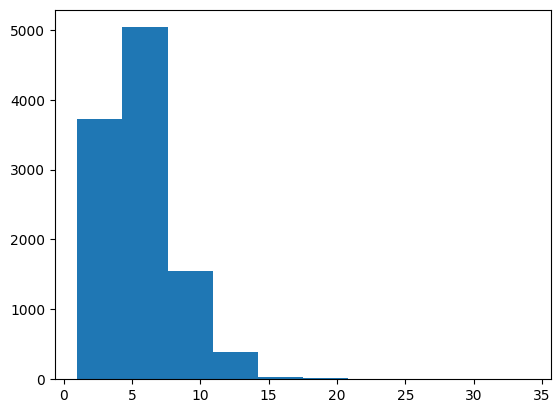

In [ ]:
plt.hist(df["length_input"])

(array([6.523e+03, 3.461e+03, 6.890e+02, 5.000e+01, 1.800e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  4.5,  8. , 11.5, 15. , 18.5, 22. , 25.5, 29. , 32.5, 36. ]),
 <BarContainer object of 10 artists>)

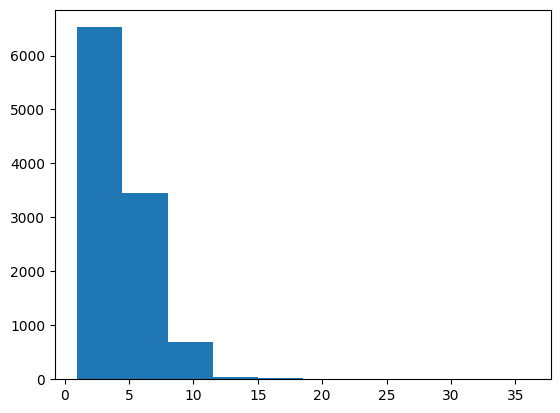

In [ ]:
plt.hist(df["length_target"])

In [ ]:
df.sample(10)

,input,target,length_input,length_target
9346,he had no difficulty solving the problem.,لم يواجه صعوبةً تذكر في حلّ المشكلة.,7,7
1061,green suits you.,يناسبك اللون الأخضر.,3,3
2458,you broke my heart.,أنتَ كسرتَ قلبي.,4,3
31,come on!,هيا,2,1
2767,this play has ended.,إنتهت المسرحية.,4,2
7722,my mother died during my absence.,ماتت أمي في غيابي.,6,4
4454,tom said he saw nothing.,قال توم بأنه لم يرى شيئا.,5,6
10738,a man touched down on the moon. a wall came do...,هبط إنسان على سطح القمر، وأنهار حائط في برلين،...,23,15
5456,i have a friend in england.,أنا لدي صديق في إنجلترا.,6,5
6948,my uncle lives near the school.,يعيش عمي قرب المدرسة.,6,4


In [ ]:
df["target"]=df["target"].apply(lambda text:f"<start> {text} <end>")

In [ ]:
df.head()

,input,target,length_input,length_target
0,hi.,<start> مرحبًا. <end>,1,1
1,run!,<start> اركض! <end>,1,1
2,help!,<start> النجدة! <end>,1,1
3,jump!,<start> اقفز! <end>,1,1
4,stop!,<start> قف! <end>,1,1


In [ ]:
english=df["input"].to_list()
arabic=df["target"].to_list()

In [ ]:
print(english[:15])

['hi.', 'run!', 'help!', 'jump!', 'stop!', 'go on.', 'go on.', 'hello!', 'hurry!', 'hurry!', 'i see.', 'i won!', 'smile.', 'cheers!', 'got it?']


In [ ]:
print(arabic[:15])

['<start> مرحبًا. <end>', '<start> اركض! <end>', '<start> النجدة! <end>', '<start> اقفز! <end>', '<start> قف! <end>', '<start> داوم. <end>', '<start> استمر. <end>', '<start> مرحباً. <end>', '<start> تعجّل! <end>', '<start> استعجل! <end>', '<start> انا اري <end>', '<start> أنا فُزت! <end>', '<start> ابتسم. <end>', '<start> في صحتك. <end>', '<start> هل فهمت؟ <end>']


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(english,arabic,test_size=0.2)

In [ ]:
len(X_train)

8593

In [ ]:
X_train[:10]

["you'd better hurry up.",
 "tom liked mary's new hairstyle.",
 'no one loves war.',
 'he is getting better.',
 "don't worry about such a thing.",
 "i've lost your phone number.",
 'it seems interesting to me.',
 'come on!',
 'i play violin.',
 'you should distinguish between right and wrong.']

In [ ]:
X_test[:2]

['the road is icy, so take care.',
 'we are not the only ones who believe that he is innocent.']

In [ ]:
len(english),len(arabic)

(10742, 10742)

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(8593, 2149, 8593, 2149)

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(english)

encoder_vocab=tokenizer.word_index
# encoder_vocab

In [ ]:
encoder_vocab_size=len(encoder_vocab)
encoder_vocab_size

4104

In [ ]:
X_train_tokens=tokenizer.texts_to_sequences(X_train)
X_test_tokens=tokenizer.texts_to_sequences(X_test)

In [ ]:
X=X_train_tokens+X_test_tokens

In [ ]:
len(X)

10742

In [ ]:
np.array(X_train_tokens[:1]).shape

(1, 4)

In [ ]:
X[:10]

[[303, 133, 298, 66],
 [7, 767, 778, 111, 2199],
 [60, 47, 271, 329],
 [8, 6, 348, 133],
 [25, 251, 51, 315, 5, 268],
 [85, 170, 18, 343, 541],
 [17, 583, 620, 4, 9],
 [45, 32],
 [1, 148, 1266],
 [2, 97, 2389, 932, 124, 46, 234]]

In [ ]:
max_input_length=max([len(i) for i in X])
max_input_length

34

In [ ]:
tokenizer_decoder=Tokenizer()
tokenizer_decoder.fit_on_texts(arabic)

decoder_vacab=tokenizer_decoder.word_index

In [ ]:
decoder_vacab_size=len(decoder_vacab)+1
decoder_vacab_size

12031

In [ ]:
y_train_tokens=tokenizer_decoder.texts_to_sequences(y_train)
y_test_tokens=tokenizer_decoder.texts_to_sequences(y_test)

In [ ]:
y=y_train_tokens+y_test_tokens

In [ ]:
decoder_int_vacab={idx:word for word,idx in decoder_vacab.items()}
for i in y[0]:
  print(decoder_int_vacab[i],i)

start 1
من 3
الأفضل 161
لك 44
أن 4
تسرع 2260
end 2


In [ ]:
decoder_input,decoder_output=[],[]
for i in y:
  decoder_input.append(i[:-1])
  decoder_output.append(i[1:])

In [ ]:
max_target_length=max([len(i) for i in y])
max_target_length

38

In [ ]:
# pad sequences
encoder_input_seqs=pad_sequences(X,maxlen=max_input_length,padding="pre")
decoder_input_seqs=pad_sequences(decoder_input,maxlen=max_target_length,padding="post")
decoder_output_seqs=pad_sequences(decoder_output,maxlen=max_target_length,padding="post")

In [ ]:
encoder_input_seqs.shape

(10742, 34)

In [ ]:
decoder_input_seqs[0]

array([   1,    3,  161,   44,    4, 2260,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0], dtype=int32)

In [ ]:
decoder_output_seqs[0]

array([   3,  161,   44,    4, 2260,    2,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0], dtype=int32)

In [ ]:
decoder_output_seqs.shape

(10742, 38)

In [ ]:
decoder_input_seqs[:2]

array([[   1,    3,  161,   44,    4, 2260,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   1,   50,    5, 8113, 1245,   43,  488,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0]], dtype=int32)

In [ ]:
decoder_output_seqs[:2]

array([[   3,  161,   44,    4, 2260,    2,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [  50,    5, 8113, 1245,   43,  488,    2,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0]], dtype=int32)

In [ ]:
decoder_vacab_size

12031

In [ ]:
encoder_input_layer=Input(shape=(None,))
encoder_embedd=Embedding(encoder_vocab_size,256)(encoder_input_layer)
_,state_h,state_c=encoder_lstm=LSTM(256,return_state=True)(encoder_embedd)
encoder_states=[state_h,state_c]

In [ ]:
decoder_input_layer=Input(shape=(None,))
decoder_embedd=Embedding(decoder_vacab_size,256)(decoder_input_layer)
decoder_lstm=LSTM(256,return_sequences=True)(decoder_embedd,initial_state=encoder_states)
decoder_outputs=Dense(decoder_vacab_size+1,activation="softmax")(decoder_lstm)
model_eng2ar=Model([encoder_input_layer,decoder_input_layer],decoder_outputs)
model_eng2ar.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 256)    1050624     ['input_1[0][0]']                
                                                                                                  
 embedding_2 (Embedding)        (None, None, 256)    3079936     ['input_3[0][0]']                
                                                                                              

In [ ]:
encoder_input_seqs.shape

(10742, 34)

In [ ]:
decoder_input_seqs.shape,decoder_output_seqs.shape

((10742, 38), (10742, 38))

In [ ]:
BATCH_SIZE = 64
EPOCHS = 200
loss = tf.losses.SparseCategoricalCrossentropy()
model_eng2ar.compile(optimizer='rmsprop', loss=loss, metrics=['accuracy'])
history=model_eng2ar.fit([encoder_input_seqs, decoder_input_seqs], decoder_output_seqs,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS)

Epoch 1/200
168/168 [==============================] - 29s 120ms/step - loss: 1.4762 - accuracy: 0.8611
Epoch 2/200
168/168 [==============================] - 9s 56ms/step - loss: 0.9448 - accuracy: 0.8869
Epoch 3/200
168/168 [==============================] - 8s 49ms/step - loss: 0.9309 - accuracy: 0.8872
Epoch 4/200
168/168 [==============================] - 8s 45ms/step - loss: 0.9246 - accuracy: 0.8873
Epoch 5/200
168/168 [==============================] - 7s 45ms/step - loss: 0.9161 - accuracy: 0.8876
Epoch 6/200
168/168 [==============================] - 7s 43ms/step - loss: 0.9084 - accuracy: 0.8880
Epoch 7/200
168/168 [==============================] - 8s 45ms/step - loss: 0.9038 - accuracy: 0.8881
Epoch 8/200
168/168 [==============================] - 8s 47ms/step - loss: 0.8999 - accuracy: 0.8882
Epoch 9/200
168/168 [==============================] - 7s 43ms/step - loss: 0.8961 - accuracy: 0.8882
Epoch 10/200
168/168 [==============================] - 7s 43ms/step - loss: 0.8

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']


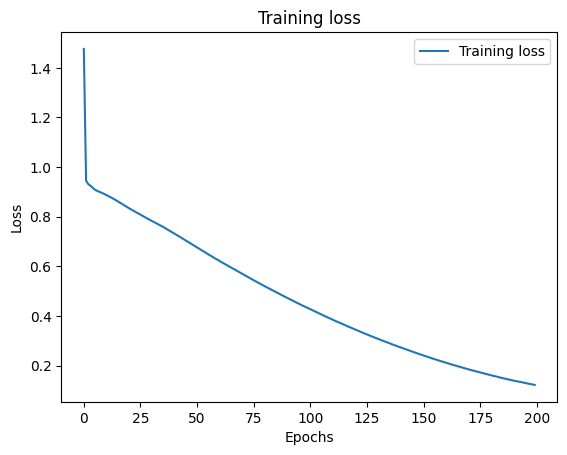

In [ ]:
from  matplotlib import pyplot as plt
plt.plot(loss, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

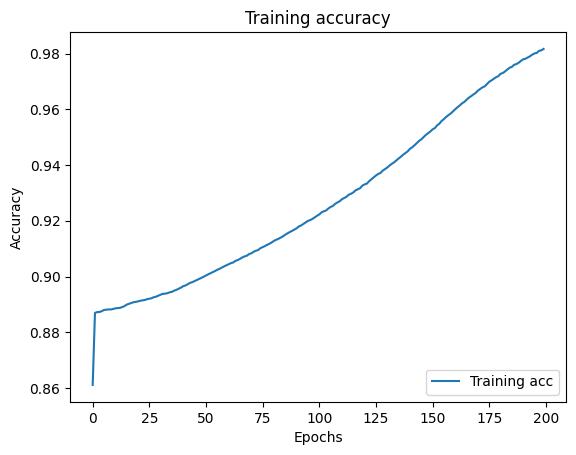

In [ ]:
plt.plot(accuracy, label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
model_eng2ar.save("eng2ara")